#### 1 A Brief matplotlib API Primer

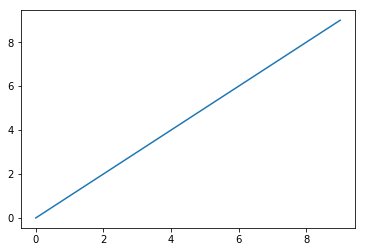

In [2]:
import matplotlib.pyplot as plt
import numpy as np
data = np.arange(10)
plt.plot(data)

###############Figures and Subplots##################


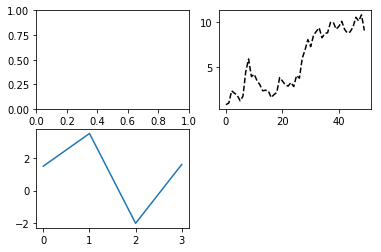

In [12]:
print('###############Figures and Subplots##################')
#在matplotlib下画图是在一个Figure object里。 add_subplot()将画布分成2*2，1表示从第一张开始画。
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
plt.plot(np.random.randn(50).cumsum(), 'k--')  #'k--'代表 black dashed line
ax3 = fig.add_subplot(2,2,3)
plt.plot([1.5, 3.5, -2, 1.6]) #每个值都是代表Y坐标轴上的点

###############Adjusting the spacing around subplots##################


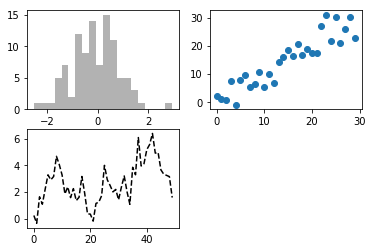

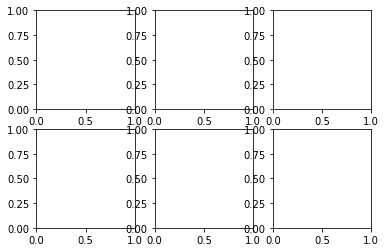

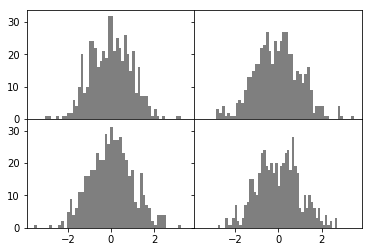

In [23]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
plt.plot(np.random.randn(50).cumsum(), 'k--')
# _ 表示临时无意变量
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

fig, axes = plt.subplots(2,3)
axes  #plt.subplots可以输出新图并返回一个numpy array，包含subplot objects

print('###############Adjusting the spacing around subplots##################')
#sharex和sharey表示是否共享X轴和Y轴
fig, axes = plt.subplots(2,2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

###############Colors, Markers, and Line Styles##################


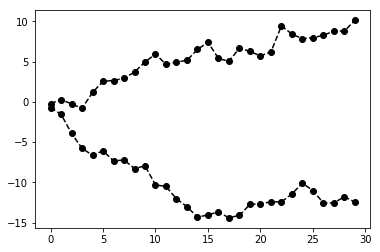

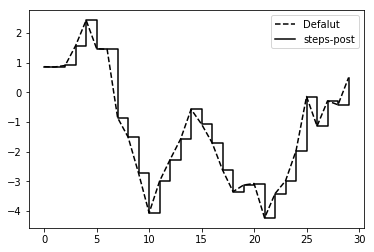

In [57]:
print('###############Colors, Markers, and Line Styles##################')
#‘g--’和'linestyle="--", color="g"'画出来一样
from numpy.random import randn
np.random.seed(12345)
plt.plot(randn(30).cumsum(), 'ko--')
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

fig = plt.figure()
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Defalut')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

###############Ticks, Labels, and Legends##################
###############Setting the title, axis labels, ticks, and ticklabels##################
###############Adding legends##################


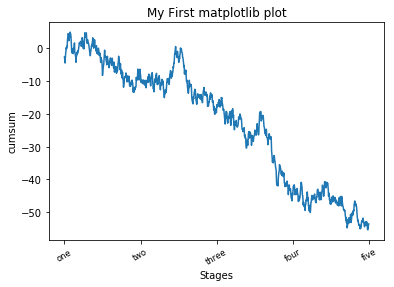

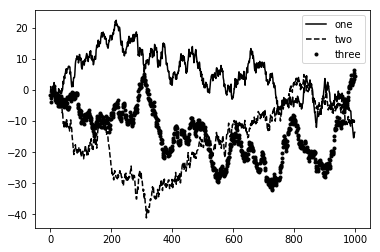

In [66]:
print('###############Ticks, Labels, and Legends##################')
print('###############Setting the title, axis labels, ticks, and ticklabels##################')
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())
#修改X轴，用set_xticks确定位置，至于名字也可以修改，用set_xticklabels
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one','two','three','four','five'], rotation=30, fontsize='small')
#ax.set_title('My First matplotlib plot')
#ax.set_xlabel('Stages')
#ax.set_ylabel('cumsum')
#输出也可以构建一个不同参数的字典，用ax.set()函数导入
props = {
    'title':'My First matplotlib plot',
    'xlabel':'Stages',
    'ylabel':'cumsum'
}
ax.set(**props)

print('###############Adding legends##################')
from numpy.random import randn
fig = plt.figure(); ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--',label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')

###############Annotations and Drawing on a Subplot##################


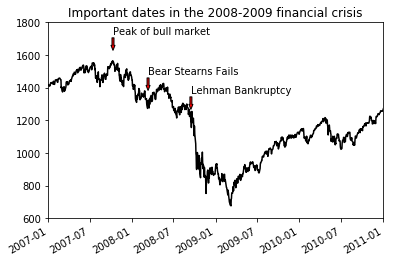

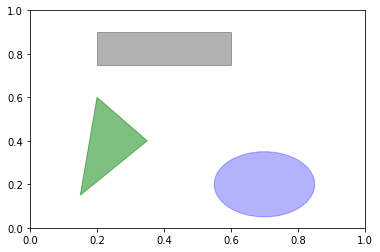

In [103]:
print('###############Annotations and Drawing on a Subplot##################')
from datetime import datetime
import pandas as pd
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
data = pd.read_csv('../examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']
spx.plot(ax=ax, style='k-')
crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]
#这里参数不是很理解
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='red', headwidth=4, width=2,
                                headlength=5),
                horizontalalignment='left', verticalalignment='top')
# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title('Important dates in the 2008-2009 financial crisis')


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
rect = plt.Rectangle((0.2,0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15,0.15],[0.35,0.4],[0.2,0.6]],
                  color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

In [77]:
print('###############Saving Plots to File##################')
#bbox_inches可以去除实际图的白边
plt.savefig('filepath.png', dpi=400, bbox_inches='tight')
#savefig也可写到任何file类似的object里，比如BytesIO
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()
print('###############matplotlib Configuration##################')
#rc方法可以把figure size设成10*10
plt.rc('figure', figsize=(10,10))
#一系列的keyword arguments可指新参数
font_options = {'family' : 'monospace',
                    'weight' : 'bold',
                    'size' :'small'}
plt.rc('font',**font_options)

#### 2 Plotting with pandas and seaborn

###############Line Plots##################
0    -0.384394
10    0.879368
20    0.639000
30    1.135674
40    1.349592
50    2.040749
60    2.462360
70    1.570018
80    0.964586
90    1.869452
dtype: float64
           A         B         C         D
0   0.671739 -0.707523  1.786287  0.189442
10  1.130678 -1.481199  3.681473  0.354439
20  1.625815 -0.354172  3.016723  1.398778
30  2.585767 -0.022383  2.537226 -0.420315
40  4.071397  1.546966  1.849386  0.999853
50  1.928224  0.140449  1.949401  1.072465
60  0.885909  0.645256  2.234415  0.166700
70  0.768314 -2.007658  3.537869  0.170666
80  0.249536 -4.080399  5.391792 -0.100505
90  0.859931 -4.715817  4.464082 -0.599457


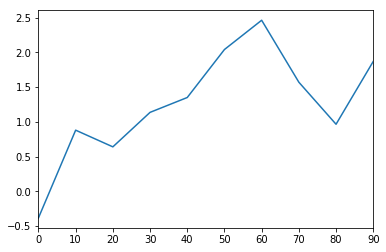

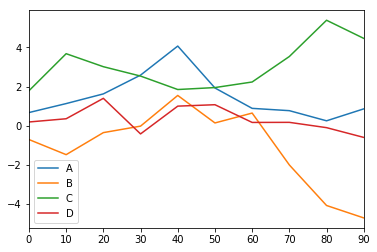

In [111]:
print('###############Line Plots##################')
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0,100,10))
print(s)
s.plot()

a=np.random.randn(10,4)
#cumsum(0)对列累加
df=pd.DataFrame(a.cumsum(0),
               columns=['A','B','C','D'],
               index=np.arange(0,100,10))
print(df)
df.plot()

###############Bar Plots##################
   total_bill   tip smoker  day    time  size
0       16.99  1.01     No  Sun  Dinner     2
1       10.34  1.66     No  Sun  Dinner     3
2       21.01  3.50     No  Sun  Dinner     3
3       23.68  3.31     No  Sun  Dinner     2
4       24.59  3.61     No  Sun  Dinner     4
size   2   3   4  5
day                
Fri   16   1   1  0
Sat   53  18  13  1
Sun   39  15  18  3
Thur  48   4   5  1
   total_bill   tip smoker  day    time  size   tip_pct
0       16.99  1.01     No  Sun  Dinner     2  0.063204
1       10.34  1.66     No  Sun  Dinner     3  0.191244
2       21.01  3.50     No  Sun  Dinner     3  0.199886
3       23.68  3.31     No  Sun  Dinner     2  0.162494
4       24.59  3.61     No  Sun  Dinner     4  0.172069


/Users/theomarker/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


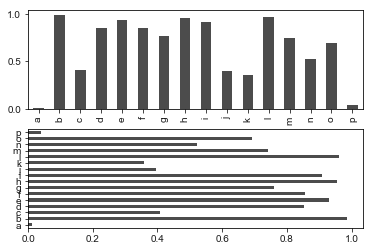

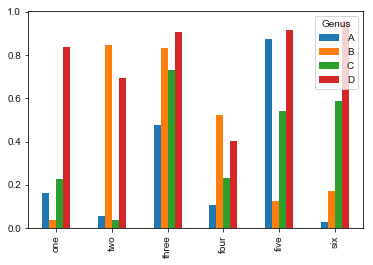

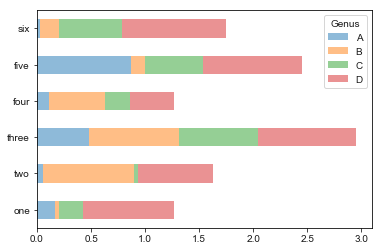

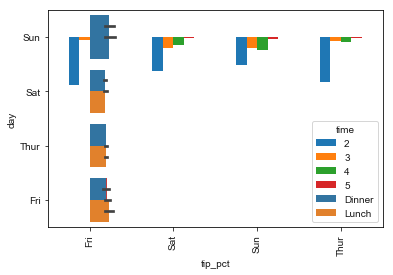

In [3]:
print('###############Bar Plots##################')
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,1)
data =  pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
#bar和barh分别将图转90度
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

df = pd.DataFrame(np.random.rand(6, 4),
                   index=['one', 'two', 'three', 'four', 'five', 'six'],
                   columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df.plot.bar()
df.plot.barh(stacked=True, alpha=0.5)


tips = pd.read_csv('../examples/tips.csv')
print(tips.head())
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts.head()
party_counts=party_counts.loc[:,2:5]
print(party_counts)
#归一化
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts.plot.bar()

#使用seaborn
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
print(tips.head())
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')
sns.set(style='whitegrid')

###############Histograms and Density Plots##################
0       1.473108
1      -0.009386
2      -0.058509
3      -1.191777
4      -0.821495
         ...    
395    10.111564
396     8.305531
397     8.023089
398    10.786023
399    10.263700
Length: 400, dtype: float64


/Users/theomarker/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 0.3)

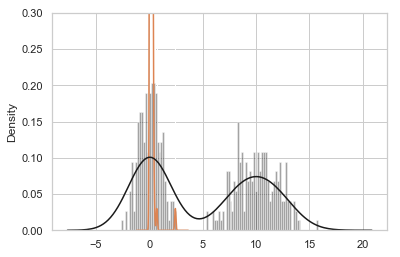

In [6]:
print('###############Histograms and Density Plots##################')
import seaborn as sns
import numpy as np
import pandas as pd
tips['tip_pct'].plot.hist(bins=50)
tips['tip_pct'].plot.density()
#seaborn画图更简单
comp1=np.random.normal(0,1,size=200)
comp2=np.random.normal(10,2,size=200)
values=pd.Series(np.concatenate([comp1, comp2]))
print(values)
sns.distplot(values, bins=100, color='k')
plt.ylim(0,0.3)

###############Scatter or Point Plots##################


/Users/theomarker/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


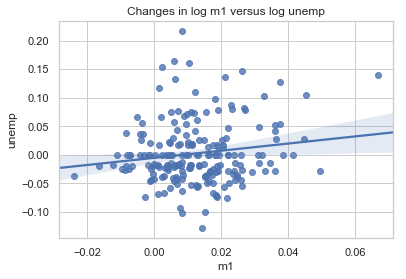

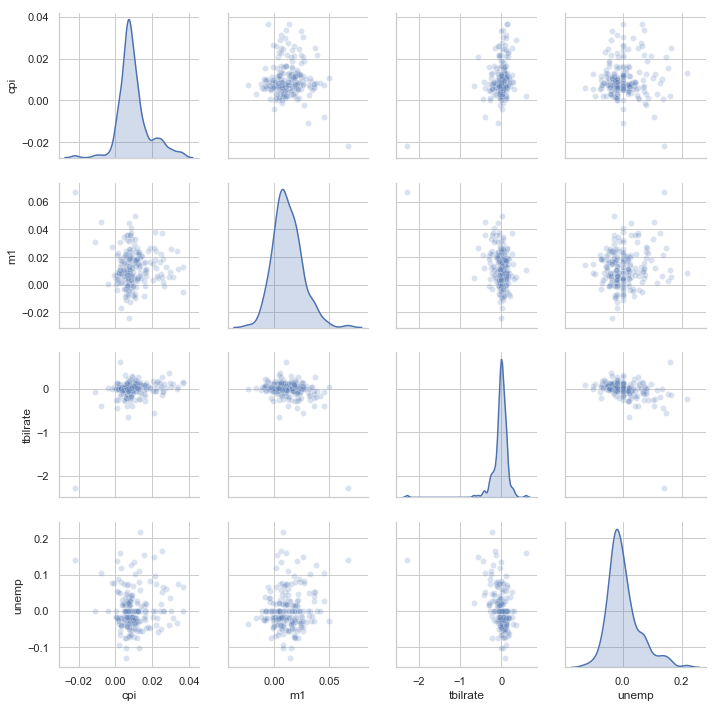

In [12]:
print('###############Scatter or Point Plots##################')
macro = pd.read_csv('../examples/macrodata.csv')
macro.head()
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
data.head()
trans_data = np.log(data).diff().dropna()
trans_data.head()
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

###############Facet Grids and Categorical Data##################


/Users/theomarker/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/theomarker/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/theomarker/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update yo

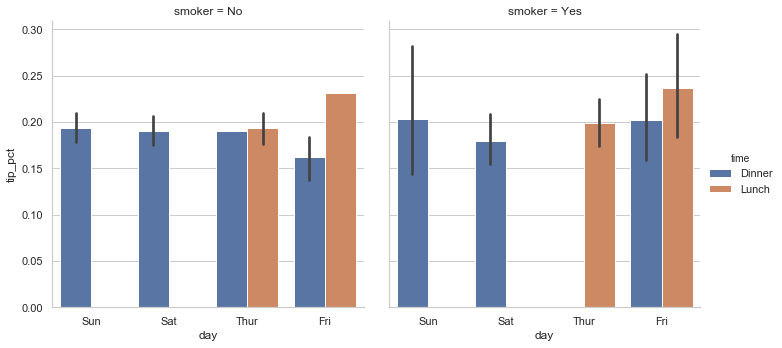

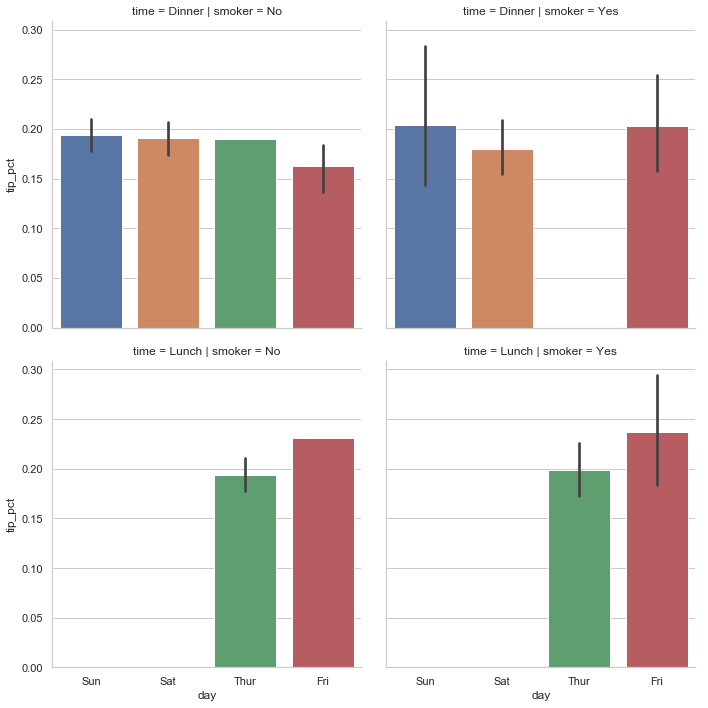

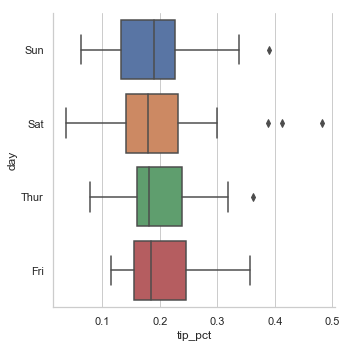

In [15]:
print('###############Facet Grids and Categorical Data##################')
#对于categorical variables用facet grid
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])
sns.factorplot(x='day', y='tip_pct', row='time',
                col='smoker',
                kind='bar', data=tips[tips.tip_pct < 1])

sns.factorplot(x='tip_pct',y='day',kind='box', data=tips[tips.tip_pct < 0.5])

TypeError: 'list' object cannot be interpreted as an integer